In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('../../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.drop(['customerID'], axis =1, inplace=True)

In [7]:
obj_col = [col for col in df.columns if df[col].dtype == 'object']

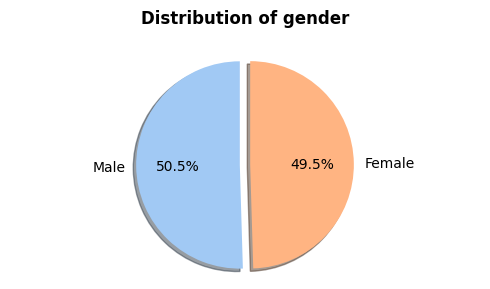

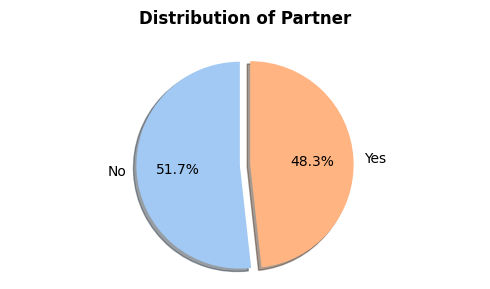

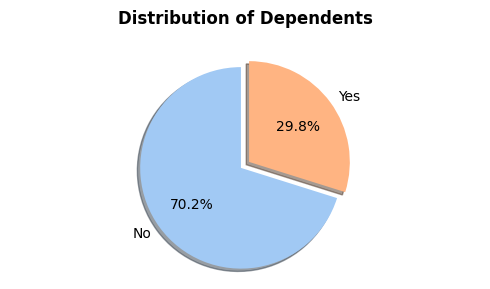

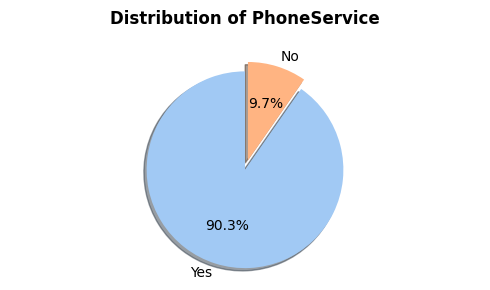

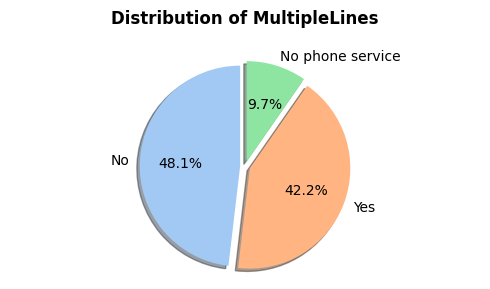

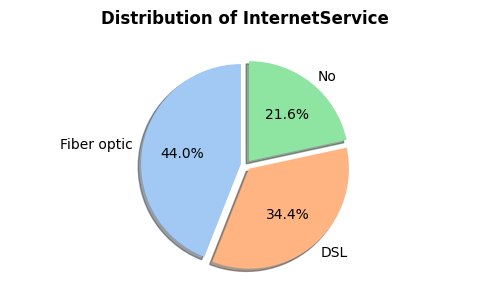

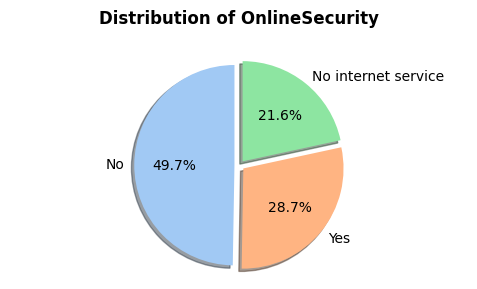

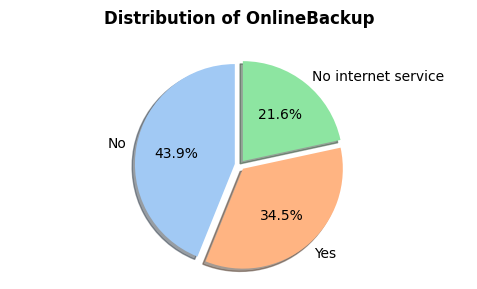

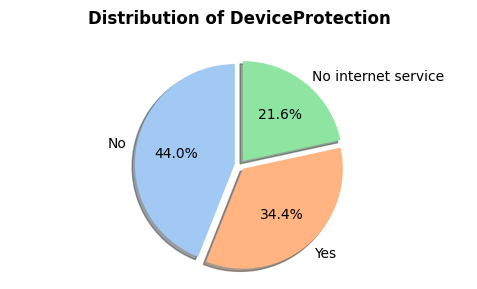

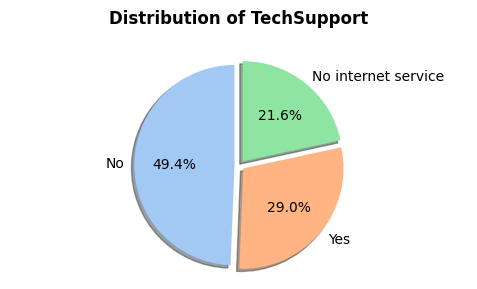

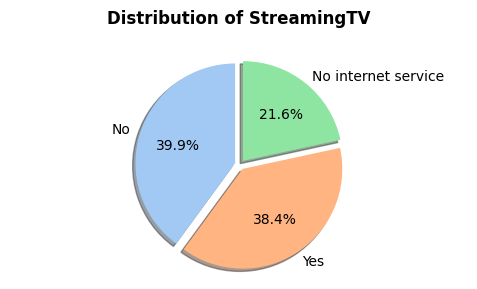

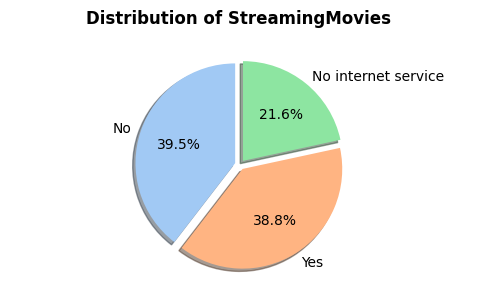

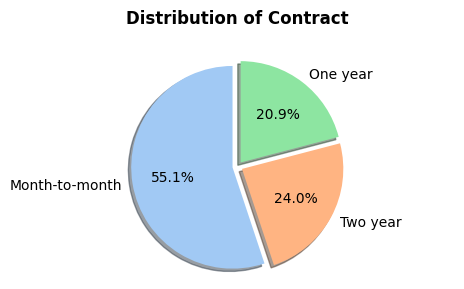

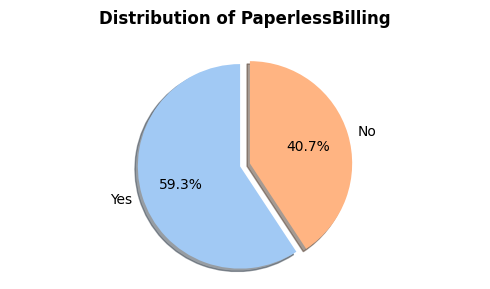

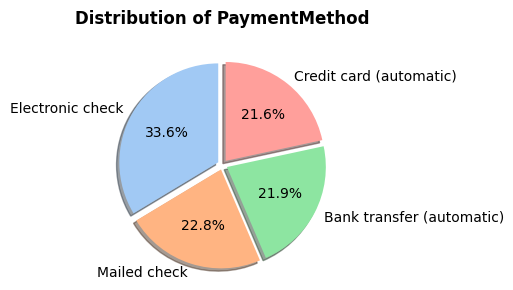

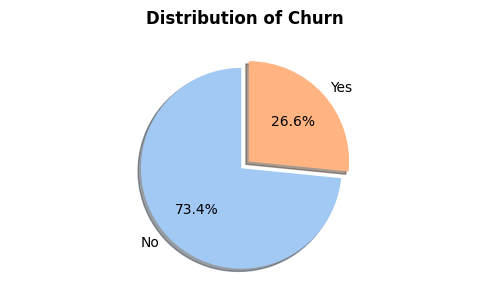

In [8]:
for col in obj_col:
    plt.figure(figsize=(5,3))
    plt.pie(df[col].value_counts(), labels = df[col].value_counts().index, autopct="%1.1f%%", startangle=90
           ,shadow=True,colors=sns.color_palette("pastel"), explode=[0.05] * len(df[col].value_counts())
           )
    plt.title(f'Distribution of {col}', fontweight='bold', pad=20)  
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

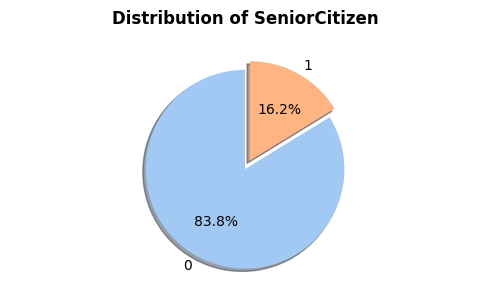

In [10]:
plt.figure(figsize=(5,3))
plt.pie(df['SeniorCitizen'].value_counts(), labels = df['SeniorCitizen'].value_counts().index, autopct="%1.1f%%", startangle=90
       ,shadow=True,colors=sns.color_palette("pastel"), explode=[0.05] * len(df['SeniorCitizen'].value_counts())
       )
plt.title(f'Distribution of SeniorCitizen', fontweight='bold', pad=20)  
plt.axis('equal')
plt.tight_layout()
plt.show()

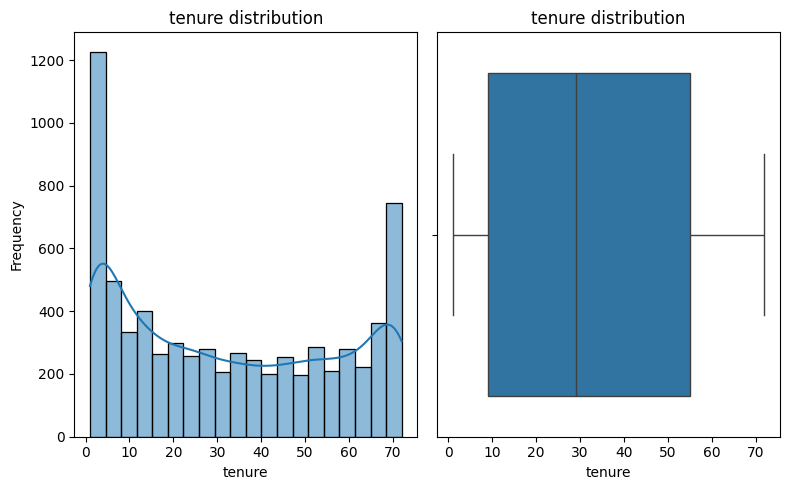

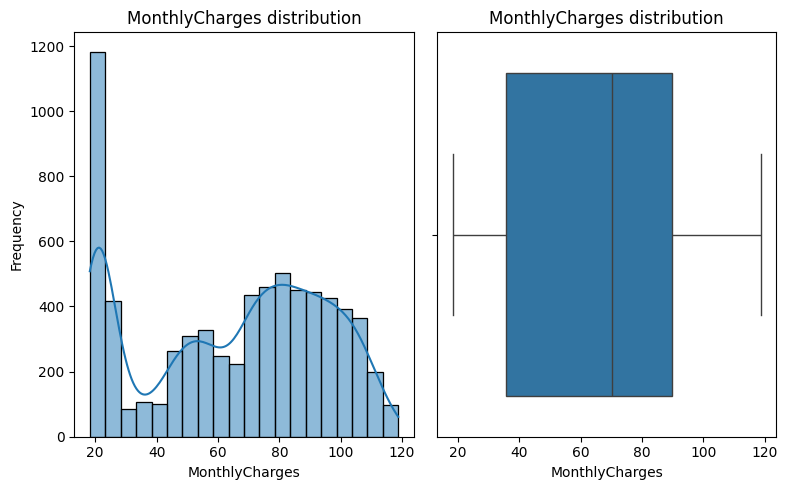

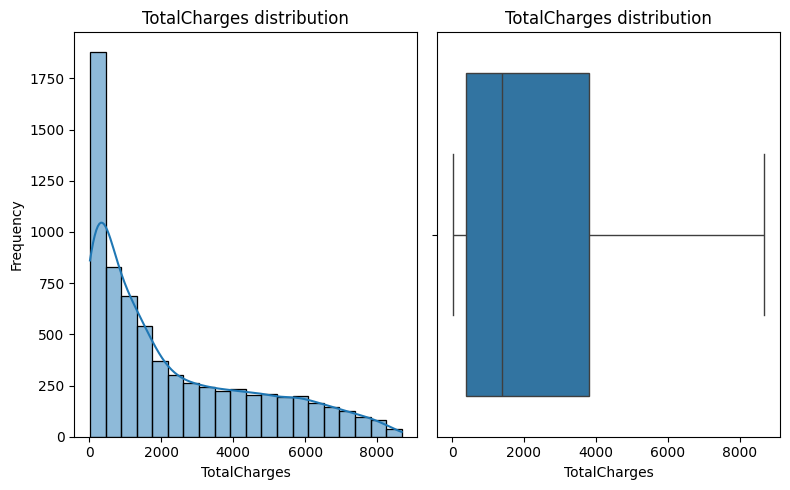

In [12]:
numerical_col = [col for col in df.columns if col not in obj_col]
numerical_col.remove('SeniorCitizen')
for col in numerical_col:
    plt.figure(figsize=(8,5))
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'{col} distribution')
    plt.tight_layout()
    plt.show()

In [9]:
# Analyze churn distribution
churn_rate = (df['Churn'] == 'Yes').mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 26.58%


<Axes: >

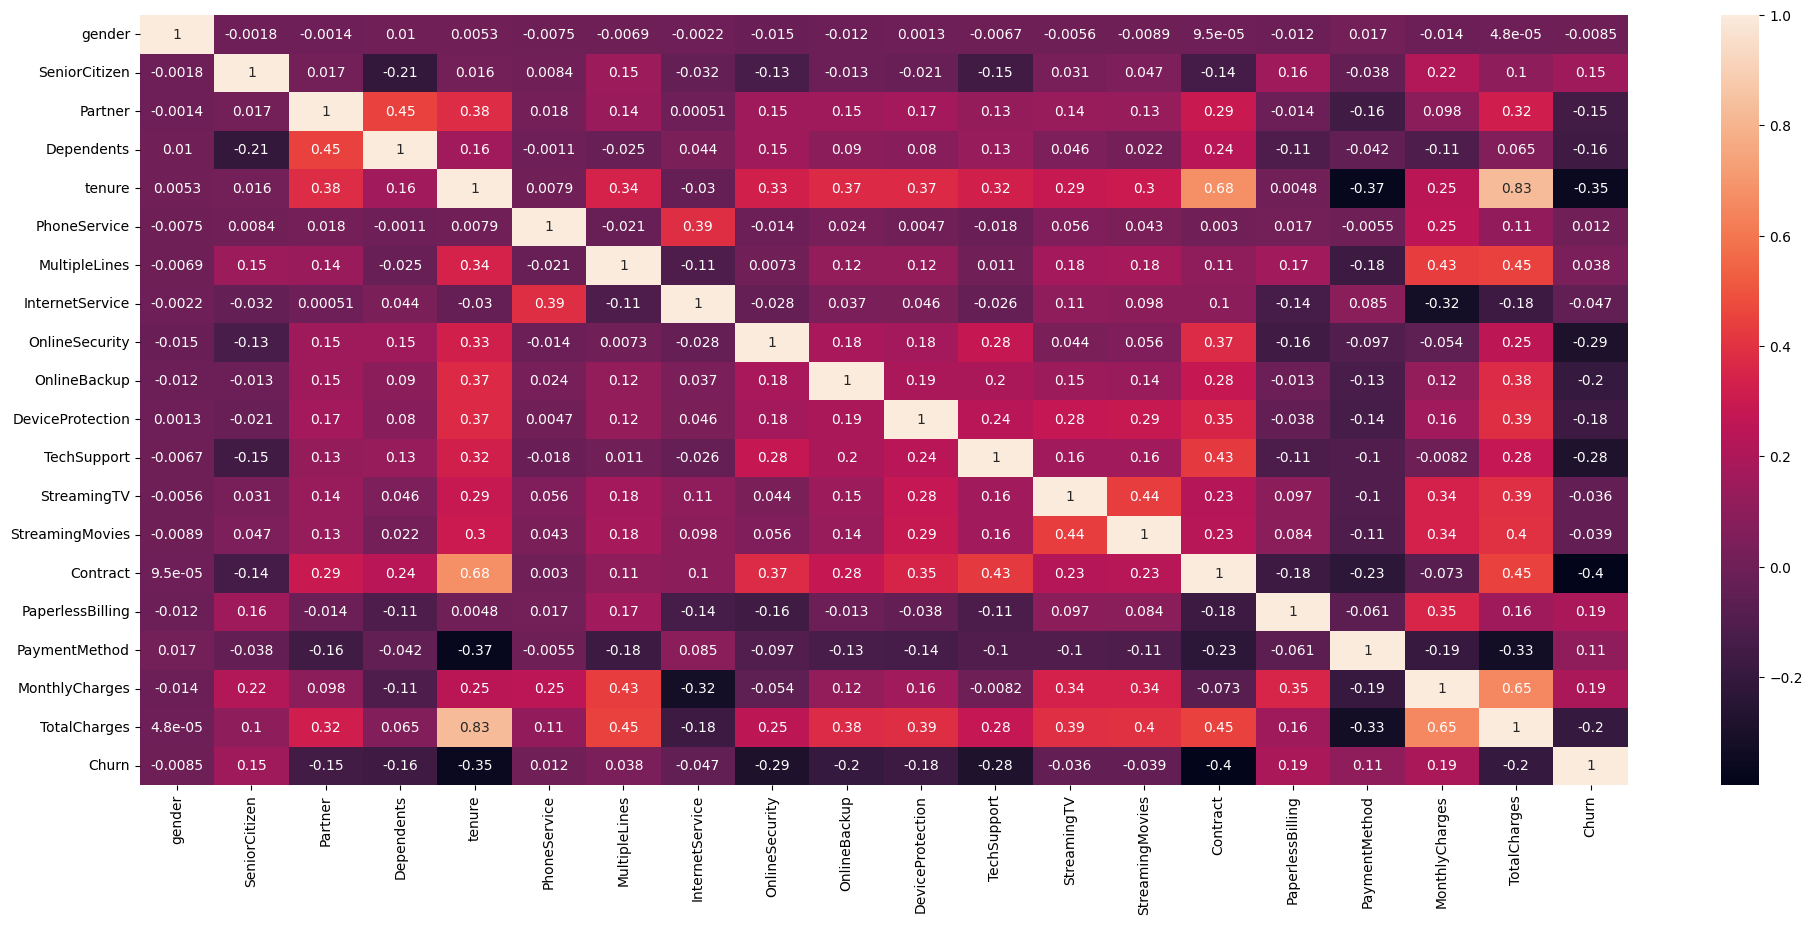

In [15]:
encoder = LabelEncoder()
for col in obj_col:
    df[col] = encoder.fit_transform(df[col])

plt.figure(figsize=(24,10))
data_corr = df.corr()
sns.heatmap(data_corr, annot=True)